# Get the Data

*I am choosing to work with a datset from UCI's Machine Learning Database.  I am interested in examining the relationship between grades(target) and the various features explored in the dataset.*

In [1]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## get the data from csv
df = pd.read_csv("student_mat.csv", sep=';')

In [3]:
## inspect the dataframe
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Engineer a possible target vector

*Final grade prediction could be a regression problem, but I am also considering making an average grade feature that is the average of all three grades and then assigning those grades as "fail", "proficient" and "advanced" and then making it a classification problem.  Grades in Portugal, where the data is from, are done three times but the dataset did not specify how much the G1 or G2 factor into the final grade (G3).  I am going to operate under the assumption that the third grade is for the third and final grading period and is not dependent on the other two grades.*

In [4]:
## engineer a an average grade feature that is an average of all three grades for the year
## round avg grade for three years to 2 decimal places
df['avg_grade'] = round((df['G1'] + df['G2'] + df['G3']) / 3, 2)

In [5]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,avg_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,5.67
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,5.33
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,8.33
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,14.67
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,8.67


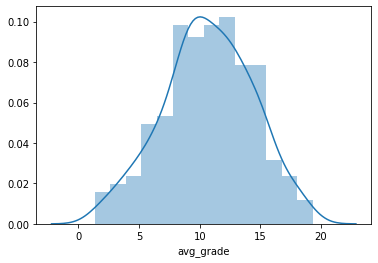

In [6]:
## check distribution of avg_grade for skewness
sns.distplot(df['avg_grade'])

In [7]:
## my first attempt at creating my categories
## I did this and it worked, but it was not efficient or very Pythonic in my opinion
'''
level_map = {0: 'fail', 1: 'fail', 2: 'fail', 3: 'fail', 4: 'fail',
             5: 'fail', 6: 'fail', 7: 'fail', 8: 'fail', 9: 'fail',
            10: 'proficient', 11: 'proficient', 12: 'proficient', 13: 'proficient',
            14: 'proficient', 15: 'proficient', 16: 'advanced', 17 : 'advanced',
            18: 'advanced', 19: 'advanced', 20: 'advanced'}
df['proficiency'] = df['G3'].map(level_map)
'''

"\nlevel_map = {0: 'fail', 1: 'fail', 2: 'fail', 3: 'fail', 4: 'fail',\n             5: 'fail', 6: 'fail', 7: 'fail', 8: 'fail', 9: 'fail',\n            10: 'proficient', 11: 'proficient', 12: 'proficient', 13: 'proficient',\n            14: 'proficient', 15: 'proficient', 16: 'advanced', 17 : 'advanced',\n            18: 'advanced', 19: 'advanced', 20: 'advanced'}\ndf['proficiency'] = df['G3'].map(level_map)\n"

In [8]:
# Create a list to store the data
grade_status = []

# For each row in the column,
for row in df['avg_grade']:
    if row >= 16:
        grade_status.append('advanced')
    elif row > 10:
        grade_status.append('proficient')
    elif row >= 0:
        grade_status.append('fail')
   
        
# Create a column from the list
df['grade_status'] = grade_status

df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,avg_grade,grade_status
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,5.67,fail
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,5.33,fail
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,8.33,fail
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,14.67,proficient
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,8.67,fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,4,4,5,4,11,9,9,9,9.00,fail
391,MS,M,17,U,LE3,T,3,1,services,services,...,5,3,4,2,3,14,16,16,15.33,proficient
392,MS,M,21,R,GT3,T,1,1,other,other,...,3,3,3,3,3,10,8,7,8.33,fail
393,MS,M,18,R,LE3,T,3,2,services,other,...,1,3,4,5,0,11,12,10,11.00,proficient


# Target Vector 1: G3 Final Grade

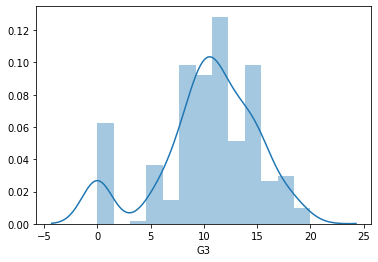

In [9]:
## check distribution of avg_grade for skewness
sns.distplot(df['G3'])

# Target Vector 2: Grade Status

In [10]:
## check how many classes
df['grade_status'].nunique()

3

In [11]:
df['grade_status'].value_counts()

proficient    187
fail          179
advanced       29
Name: grade_status, dtype: int64

In [12]:
df['grade_status'].value_counts(normalize= True)

proficient    0.473418
fail          0.453165
advanced      0.073418
Name: grade_status, dtype: float64

# Evaluation Metrics

Target vector 1: Mean absolute error

Target vector 2: Precision for 'fail' and recall for 'fail'

# How will data be split?

*I will split the data randomly with 20% going to the test set and 65% to the training set and 15% going to the validation set.*

# Features to Exclude

In [13]:
## check for missing values
df.isnull().sum()

school          0
sex             0
age             0
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
reason          0
guardian        0
traveltime      0
studytime       0
failures        0
schoolsup       0
famsup          0
paid            0
activities      0
nursery         0
higher          0
internet        0
romantic        0
famrel          0
freetime        0
goout           0
Dalc            0
Walc            0
health          0
absences        0
G1              0
G2              0
G3              0
avg_grade       0
grade_status    0
dtype: int64

In [14]:
## look at a sample of 20 rows look for redundancy/duplicates
df.sample(20)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,avg_grade,grade_status
58,GP,M,15,U,LE3,T,1,2,other,at_home,...,2,1,1,5,2,9,10,9,9.33,fail
228,GP,M,18,U,LE3,T,2,1,at_home,other,...,2,4,5,3,14,10,8,9,9.00,fail
145,GP,F,15,U,GT3,T,1,1,other,services,...,2,1,2,5,0,8,11,11,10.00,fail
278,GP,F,18,U,GT3,T,4,4,health,health,...,4,1,1,4,15,9,8,8,8.33,fail
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,8.67,fail
319,GP,F,18,U,GT3,T,4,4,teacher,other,...,4,3,3,5,2,11,11,11,11.00,proficient
348,GP,F,17,U,GT3,T,4,3,health,other,...,3,1,3,4,0,13,15,15,14.33,proficient
11,GP,F,15,U,GT3,T,2,1,services,other,...,2,1,1,4,4,10,12,12,11.33,proficient
264,GP,F,18,U,GT3,T,2,2,at_home,services,...,3,1,1,3,0,9,10,0,6.33,fail
393,MS,M,18,R,LE3,T,3,2,services,other,...,1,3,4,5,0,11,12,10,11.00,proficient


In [15]:
df.describe(exclude = 'number')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,grade_status
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2,3
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no,proficient
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263,187


In [16]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,avg_grade
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,10.679139
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,3.696912
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,1.330000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,8.330000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,10.670000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,13.330000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,19.330000


In [17]:
## look into 'school'
## two school names
df['school'].value_counts()

GP    349
MS     46
Name: school, dtype: int64

In [18]:
## address means urbran or rural
df['address'].value_counts()

U    307
R     88
Name: address, dtype: int64

In [19]:
## famsize
## either 3 or less, or greater than 3
df['famsize'].value_counts()

GT3    281
LE3    114
Name: famsize, dtype: int64

I have not found any duplicates or outliers or any feature that at this point merits being dropped or removed.

# Exploratory Visualizations

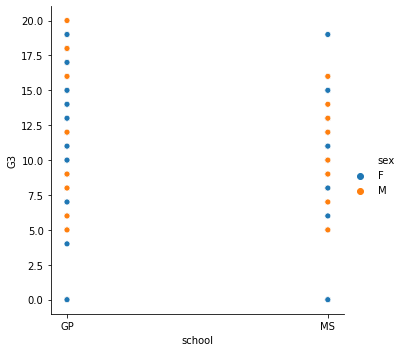

In [20]:
## are there big differences between the schools performance?
sns.relplot(x = 'school', y = 'G3', data = df, hue = 'sex')
plt.show()

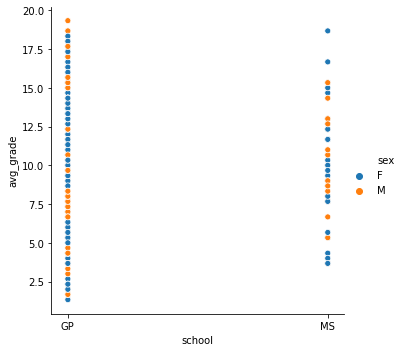

In [21]:
sns.relplot(x = 'school', y = 'avg_grade', data = df, hue = 'sex')
plt.show()

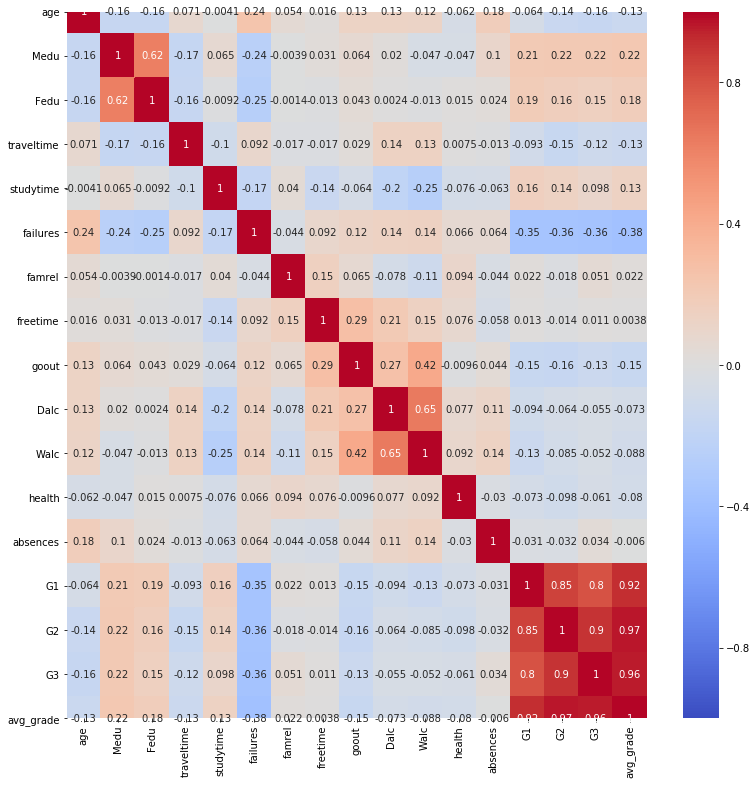

In [22]:
plt.figure(figsize=(13,13))
sns.heatmap(df.corr(), vmin=-1, cmap='coolwarm', annot=True)
plt.show()

# Baselines

In [23]:
## mean baseline for final grade (G3)
df['G3'].mean()

10.415189873417722

In [24]:
## mean baseline for average grade (avg_grade)
df['avg_grade'].mean()

10.679139240506325

In [25]:
## majority class for grade status
df['grade_status'].value_counts()

proficient    187
fail          179
advanced       29
Name: grade_status, dtype: int64

In [26]:
## normalize to get percentages
df['grade_status'].value_counts(normalize = True)

proficient    0.473418
fail          0.453165
advanced      0.073418
Name: grade_status, dtype: float64

For Target Vector 1: the baseline mean grade is 10.42

For Target Vector 2: the majority class is 'proficient' so our baseline guess would be that all students are proficient

# Keep the original DataFrame safe

In [27]:
original_df = df

# Model 1: Regression w/ Target Vector 1

## Encoding the labels

In [28]:
df.describe(exclude = 'number').columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'grade_status'],
      dtype='object')

In [29]:
# label encoding the data 
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 

df['school']= le.fit_transform(df['school']) 
df['sex']= le.fit_transform(df['sex']) 
df['address']= le.fit_transform(df['address'])
df['famsize']= le.fit_transform(df['famsize']) 
df['Pstatus']= le.fit_transform(df['Pstatus']) 
df['Mjob']= le.fit_transform(df['Mjob']) 
df['Fjob']= le.fit_transform(df['Fjob']) 
df['reason']= le.fit_transform(df['reason']) 
df['guardian']= le.fit_transform(df['guardian']) 
df['schoolsup']= le.fit_transform(df['schoolsup']) 
df['famsup']= le.fit_transform(df['famsup']) 
df['paid']= le.fit_transform(df['paid']) 
df['activities']= le.fit_transform(df['activities']) 
df['nursery']= le.fit_transform(df['nursery']) 
df['higher']= le.fit_transform(df['higher']) 
df['internet']= le.fit_transform(df['internet']) 
df['romantic']= le.fit_transform(df['romantic']) 
df['grade_status']= le.fit_transform(df['grade_status']) 


## Split the data

In [30]:
## features matrix without target (G3) and 'avg_grade' which is dependent on (G1, G2, G3)
X = df.drop(columns = ['G3', 'avg_grade'])

## target vector dependent variable final grade (G3)
y = df['G3']

In [31]:
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()


/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [32]:
from sklearn.model_selection import train_test_split

## first split into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=14)


## next split train into training and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=14)

In [33]:
X_train.shape, X_val.shape, y_train.shape, y_test.shape

((252, 34), (64, 34), (252,), (79,))

## Fit a model

In [34]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state = 14)
model.fit(X_train, y_train)

y_pred = model.predict(X_train)

y_pred.shape


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(252,)

In [35]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_train, y_pred)
mae

0.41865079365079366

In [36]:
from sklearn.metrics import r2_score
r_squared_g3 = r2_score(y_train, y_pred)
r_squared_g3

0.9713492558083253

## Hyperparameter Tuning

In [37]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [38]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

'''rf = RandomForestRegressor()'''
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100,
                               cv = 5, verbose=10, random_state=14, n_jobs = -1)

In [39]:
rf_random.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   46.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   51.1s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   54.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   59.1s
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:  1.1min
[Paralle

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=10, n_jobs=None,
                                                   oob_score=False,
                                                   random_state=1...


In [40]:
rf_random.best_params_

{'n_estimators': 1155,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': True}

In [41]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=90,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1155,
                      n_jobs=None, oob_score=False, random_state=14, verbose=0,
                      warm_start=False)

In [42]:
pipeline = rf_random.best_estimator_
y_pred_tuned = pipeline.predict(X_test)
y_pred_tuned.shape

(79,)

In [43]:
mae = mean_absolute_error(y_test, y_pred_tuned)
mae

1.2659243310254338

In [44]:
r_squared_tuned = r2_score(y_test, y_pred_tuned)
r_squared_tuned

0.789612434392676

# Model 2: Classification

In [45]:
## 2 is proficient
## 1 is fail
## 0 is advanced
df['grade_status'].value_counts()

2    187
1    179
0     29
Name: grade_status, dtype: int64

In [46]:
df.sample(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,avg_grade,grade_status
30,0,1,15,1,0,1,4,4,1,3,...,2,3,4,5,0,9,11,12,10.67,2
208,0,0,16,1,0,1,1,1,0,2,...,2,1,4,5,6,9,9,10,9.33,1
394,1,1,19,1,1,1,1,1,2,0,...,3,3,3,5,5,8,9,9,8.67,1
340,0,0,19,1,0,1,2,1,3,3,...,4,1,3,3,4,11,12,11,11.33,2
146,0,0,15,1,0,1,3,2,1,3,...,2,1,1,3,0,6,7,0,4.33,1
377,1,0,18,0,1,1,4,4,4,3,...,3,3,4,2,4,8,9,10,9.00,1
323,0,0,17,1,0,1,3,1,3,3,...,3,2,3,5,1,12,14,15,13.67,2
274,0,0,17,1,0,1,2,4,0,1,...,3,1,1,1,2,10,10,10,10.00,1
4,0,0,16,1,0,1,3,3,2,2,...,2,1,2,5,4,6,10,10,8.67,1
0,0,0,18,1,0,0,4,4,0,4,...,4,1,1,3,6,5,6,6,5.67,1


# Split the Data

In [47]:
## features matrix without target (grade_status) and 'avg_grade' which is dependent on (G1, G2, G3)
X1 = df.drop(columns = ['grade_status', 'avg_grade'])

## target vector dependent variable final grade (G3)
y1 = df['grade_status']

In [48]:
from sklearn.model_selection import train_test_split

## first split into train and test 
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.20, random_state=14)


## next split train into training and validation
X_train1, X_val1, y_train1, y_val1 = train_test_split(X_train1, y_train1, test_size=0.20, random_state=14)

# Use a Pipeline

In [49]:
## change the pipline
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline


pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='most_frequent'),  
    RandomForestClassifier(n_estimators=72, random_state=14, n_jobs=-1)
)

## Fit on train
pipeline.fit(X_train1, y_train1)

## Score on val
print('Validation Accuracy', pipeline.score(X_val1, y_val1))

## Predict on test
y_pred1 = pipeline.predict(X_val1)

Validation Accuracy 0.921875


# Randomized Cross Validation

In [50]:
## get libraries

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.metrics import accuracy_score, make_scorer
accuracy_scorer = make_scorer(accuracy_score)

In [51]:
param_distributions = {
    'simpleimputer__strategy': ['mean', 'median', 'most_frequent'], 
    'randomforestclassifier__n_estimators': randint(50, 500), 
    'randomforestclassifier__max_depth': [5, 10, 15, 20, 25, None], 
    'randomforestclassifier__max_features': uniform(0, 1), 
}


search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=100, 
    cv=5, 
    scoring=accuracy_scorer, 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

search.fit(X_train1, y_train1);

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   

In [52]:
pipeline = search.best_estimator_
y_pred1 = pipeline.predict(X_val1)

In [53]:
y_pred1.shape, y_val1.shape

((64,), (64,))

In [54]:
y_pred1

array([1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 0, 1,
       2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2])

# Check Model Accuracy

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val1, y_pred1)

0.96875

## Precision and Recall 

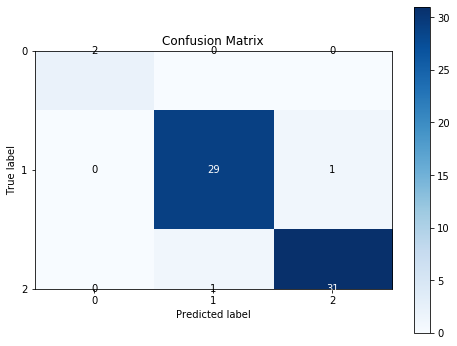

In [56]:
## 2 is proficient
## 1 is fail
## 0 is advanced
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_val1, y_pred1, figsize=(8, 6));

In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val1, y_pred1)

array([[ 2,  0,  0],
       [ 0, 29,  1],
       [ 0,  1, 31]])

In [58]:
## 2 is proficient
## 1 is fail
## 0 is advanced

In [59]:
## Overall Accuracy
(29 + 31 + 2) / (2 + 29 + 1 + 1 + 31)

0.96875

In [60]:
## Precision for 'advanced'
2/(2 + 0 + 0)

1.0

In [61]:
## Recall for 'advanced'
2/ (0 + 0 + 2)

1.0

In [62]:
## Precision for 'fail'
29/ (29 + 1 + 0)

0.9666666666666667

In [63]:
## recall for 'fail'
31/(31 + 1 + 0)

0.96875

In [64]:
## Precision for 'proficient'
31/(31 + 1 + 0)

0.96875

In [65]:
## recall for 'proficient'
31/(31 + 1 + 0)

0.96875

# Re-Try without any grade features

I got the feeling that my scores are too good using my model and that there is leakage coming from the first and second trimester grades.  I am going to create a new model without those features and check again.

In [66]:
## 2 is proficient
## 1 is fail
## 0 is advanced
## re-establish baselines
df['grade_status'].value_counts()

2    187
1    179
0     29
Name: grade_status, dtype: int64

In [67]:
df['grade_status'].value_counts(normalize = True)

2    0.473418
1    0.453165
0    0.073418
Name: grade_status, dtype: float64

In [68]:
df.sample(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,avg_grade,grade_status
206,0,0,16,1,0,0,3,1,3,2,...,3,2,2,4,5,7,7,7,7.00,1
34,0,1,16,1,0,1,3,2,2,2,...,3,1,1,5,0,12,14,15,13.67,2
246,0,1,17,1,0,1,2,3,2,2,...,2,1,1,2,4,12,12,13,12.33,2
378,1,0,18,1,0,1,3,3,2,2,...,3,1,2,1,0,15,15,15,15.00,2
57,0,1,15,1,0,1,4,4,4,1,...,2,1,1,5,4,14,15,15,14.67,2
348,0,0,17,1,0,1,4,3,1,2,...,3,1,3,4,0,13,15,15,14.33,2
261,0,1,18,1,0,1,4,3,4,2,...,2,1,1,3,2,8,8,8,8.00,1
65,0,0,16,1,1,1,4,3,4,3,...,3,1,2,1,2,16,15,15,15.33,2
54,0,0,15,1,1,0,3,3,2,2,...,4,4,4,1,6,10,13,13,12.00,2
151,0,1,16,1,1,1,2,1,0,2,...,4,3,5,5,6,12,13,14,13.00,2


In [69]:
## features matrix without target (grade_status) and all grade features
X2 = df.drop(columns = ['grade_status', 'avg_grade', 'G1', 'G2', 'G3'])

## target vector dependent variable final grade (G3)
y2 = df['grade_status']

In [70]:
from sklearn.model_selection import train_test_split

## first split into train and test 
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20, random_state=14)


## next split train into training and validation
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train2, y_train2, test_size=0.20, random_state=14)

In [71]:
## change the pipline
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline


pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='most_frequent'),  
    RandomForestClassifier(n_estimators=72, random_state=14, n_jobs=-1)
)

## Fit on train
pipeline.fit(X_train2, y_train2)

## Score on val
print('Validation Accuracy', pipeline.score(X_val2, y_val2))

## Predict on test
y_pred2 = pipeline.predict(X_val2)

Validation Accuracy 0.65625


In [72]:
param_distributions = {
    'simpleimputer__strategy': ['mean', 'median', 'most_frequent'], 
    'randomforestclassifier__n_estimators': randint(50, 500), 
    'randomforestclassifier__max_depth': [5, 10, 15, 20, 25, None], 
    'randomforestclassifier__max_features': uniform(0, 1), 
}


search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=100, 
    cv=5, 
    scoring=accuracy_scorer, 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

search.fit(X_train2, y_train2);

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   

In [73]:
## get the best parameters
pipeline = search.best_estimator_

## run predictions on validation set
y_pred2 = pipeline.predict(X_val2)

In [74]:
## check validation accuracy score
accuracy_score(y_val2, y_pred2)

0.6875

# Feature Importances

In [75]:
pipeline.named_steps['randomforestclassifier'].feature_importances_

array([0.00634336, 0.01810173, 0.04623296, 0.01208633, 0.01858271,
       0.01644664, 0.02780831, 0.047226  , 0.04390728, 0.04957972,
       0.03681802, 0.02081411, 0.02031106, 0.04215576, 0.07267215,
       0.04806651, 0.01872809, 0.0214055 , 0.01192049, 0.00987248,
       0.01577372, 0.01103232, 0.01366468, 0.03772012, 0.05697573,
       0.05874758, 0.01753519, 0.048536  , 0.05215837, 0.09877709])

In [76]:
feature_importances = pd.DataFrame(pipeline.named_steps['randomforestclassifier'].feature_importances_,
                                   index = X_train2.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [77]:
feature_importances


,importance
absences,0.098777
failures,0.072672
goout,0.058748
freetime,0.056976
health,0.052158
Fjob,0.049580
Walc,0.048536
schoolsup,0.048067
Fedu,0.047226
age,0.046233


In [1]:
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train2.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt
plt.savefig("Top 20 Features: RF Classifier.png", bbox_inches='tight', pad_inches = .25, dpi=300)
n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='blue');

NameError: name 'pipeline' is not defined

# ELI5

In [79]:
## ELI5 doesn't like pipeline models but we can still
## use ordinalencoder and simpleimputer
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean')
)

In [80]:
## fit the model on transformed features
X_train_transformed = transformers.fit_transform(X_train2)
X_val_transformed = transformers.transform(X_val2)

model = RandomForestClassifier(n_estimators=100, random_state=14, n_jobs=-1)
model.fit(X_train_transformed, y_train2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=14, verbose=0,
                       warm_start=False)

In [81]:
##pip install eli5

In [82]:
## Calculate permutation importances

import eli5
from eli5.sklearn import PermutationImportance


permuter = PermutationImportance(
    model, 
    scoring='accuracy', 
    n_iter=5, 
    random_state=14
)

permuter.fit(X_val_transformed, y_val2)

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=100,
                                                     

In [83]:
## create a table to examine feature importances with names

feature_names = X_val2.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

famsize      -0.040625
freetime     -0.025000
romantic     -0.015625
internet     -0.015625
health       -0.009375
Walc         -0.006250
Mjob         -0.006250
activities   -0.006250
absences     -0.003125
Pstatus      -0.003125
famrel       -0.003125
higher       -0.003125
nursery      -0.003125
Dalc          0.000000
paid          0.003125
school        0.003125
studytime     0.003125
traveltime    0.003125
Medu          0.003125
reason        0.012500
guardian      0.015625
age           0.015625
Fedu          0.018750
goout         0.018750
schoolsup     0.018750
Fjob          0.021875
address       0.021875
famsup        0.025000
sex           0.031250
failures      0.065625
dtype: float64

In [84]:
type(eli5.show_weights)

function

In [85]:
## Display permutation importances

eli5.show_weights(
    permuter, 
    top=None,                   # show permutation importances for all features
    feature_names=feature_names # must be a list
)

Weight,Feature
0.0656 ± 0.0538,failures
0.0312 ± 0.0198,sex
0.0250 ± 0.0153,famsup
0.0219 ± 0.0250,address
0.0219 ± 0.0153,Fjob
0.0187 ± 0.0776,schoolsup
0.0187 ± 0.0234,goout
0.0187 ± 0.0573,Fedu
0.0156 ± 0.0280,age
0.0156 ± 0.0280,guardian


# XGBoost

In [86]:
##pip install xgboost

In [87]:
## use the xgboost classifier

from xgboost import XGBClassifier

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBClassifier(n_estimators=100, random_state=14, n_jobs=-1)
)

pipeline.fit(X_train2, y_train2)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=[], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[], return_df=True, verbose=0)),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=None,
                               n_estimators=100, n_jobs=-1, nthread=None,
                               objective='multi:softprob', random_state=14,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=1))],
       

In [88]:
## check baseline accuracy for xgboost model

from sklearn.metrics import accuracy_score
y_pred = pipeline.predict(X_val2)
print('Validation Accuracy', accuracy_score(y_val2, y_pred))

Validation Accuracy 0.640625


In [89]:
## hyperparameter tuning for Xgboost classifier
# fit_transfom on train, transform on val
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train2)
X_val_encoded = encoder.transform(X_val2)

model = XGBClassifier(
    n_estimators=1000,  # <= 1000 trees, depends on early stopping
    max_depth=5,        # try deeper trees because of high cardinality categoricals
    learning_rate=0.5,  # try higher learning rate
    n_jobs=-1
)

eval_set = [(X_train_encoded, y_train2), 
            (X_val_encoded, y_val2)]

model.fit(X_train_encoded, y_train2, 
          eval_set=eval_set,
          eval_metric='merror', 
          early_stopping_rounds=50) # Stop if the score hasn't improved in 50 rounds

[0]	validation_0-merror:0.289683	validation_1-merror:0.390625
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 50 rounds.
[1]	validation_0-merror:0.18254	validation_1-merror:0.390625
[2]	validation_0-merror:0.099206	validation_1-merror:0.34375
[3]	validation_0-merror:0.06746	validation_1-merror:0.390625
[4]	validation_0-merror:0.071429	validation_1-merror:0.359375
[5]	validation_0-merror:0.043651	validation_1-merror:0.390625
[6]	validation_0-merror:0.031746	validation_1-merror:0.359375
[7]	validation_0-merror:0.015873	validation_1-merror:0.375
[8]	validation_0-merror:0.003968	validation_1-merror:0.390625
[9]	validation_0-merror:0	validation_1-merror:0.390625
[10]	validation_0-merror:0	validation_1-merror:0.40625
[11]	validation_0-merror:0	validation_1-merror:0.40625
[12]	validation_0-merror:0	validation_1-merror:0.421875
[13]	validation_0-merror:0	validation_1-merror:0.4375
[14]	valid

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

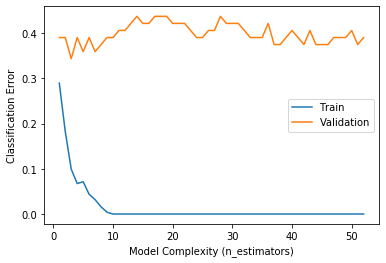

In [90]:
## visualize the hyperparameter tuning process

results = model.evals_result()
train_error = results['validation_0']['merror']
val_error = results['validation_1']['merror']
epoch = range(1, len(train_error)+1)
plt.plot(epoch, train_error, label='Train')
plt.plot(epoch, val_error, label='Validation')
plt.ylabel('Classification Error')
plt.xlabel('Model Complexity (n_estimators)')
plt.legend();

In [91]:
## new model accuracy
1 - 0.34375

0.65625

# Model 3

I want to fit a model without the lowest performing features on the permutation importance table.  I also need to change the scoring to AUC/ROC as instructed in class

In [92]:
## inspect the dataframe
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,avg_grade,grade_status
0,0,0,18,1,0,0,4,4,0,4,...,4,1,1,3,6,5,6,6,5.67,1
1,0,0,17,1,0,1,1,1,0,2,...,3,1,1,3,4,5,5,6,5.33,1
2,0,0,15,1,1,1,1,1,0,2,...,2,2,3,3,10,7,8,10,8.33,1
3,0,0,15,1,0,1,4,2,1,3,...,2,1,1,5,2,15,14,15,14.67,2
4,0,0,16,1,0,1,3,3,2,2,...,2,1,2,5,4,6,10,10,8.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,4,4,5,4,11,9,9,9,9.00,1
391,1,1,17,1,1,1,3,1,3,3,...,5,3,4,2,3,14,16,16,15.33,2
392,1,1,21,0,0,1,1,1,2,2,...,3,3,3,3,3,10,8,7,8.33,1
393,1,1,18,0,1,1,3,2,3,2,...,1,3,4,5,0,11,12,10,11.00,2


In [93]:
## features matrix without target (grade_status) and all grade features
## also remove internet, romantic, freetime, famsize
X3 = df.drop(columns = ['grade_status', 'avg_grade', 'G1', 'G2', 'G3',
                        'romantic', 'freetime', 'famsize', 'internet'])

## target vector dependent variable final grade (G3)
y3 = df['grade_status']

In [94]:
from sklearn.model_selection import train_test_split

## first split into train and test 
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.20, random_state=14)


## next split train into training and validation
X_train3, X_val3, y_train3, y_val3 = train_test_split(X_train3, y_train3, test_size=0.20, random_state=14)

In [95]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

processor = make_pipeline(
    ce.OrdinalEncoder(),
    
)

X_train_processed = processor.fit_transform(X_train3)
X_val_processed = processor.transform(X_val3)

eval_set = [(X_train_processed, y_train3), 
            (X_val_processed, y_val3)]

## scoring with merror because it is a multiclass situation

model = XGBClassifier(n_estimators=1000, n_jobs=-1)
model.fit(X_train_processed, y_train3, eval_set=eval_set, early_stopping_rounds=50)

[0]	validation_0-merror:0.361111	validation_1-merror:0.4375
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 50 rounds.
[1]	validation_0-merror:0.31746	validation_1-merror:0.46875
[2]	validation_0-merror:0.325397	validation_1-merror:0.375
[3]	validation_0-merror:0.31746	validation_1-merror:0.375
[4]	validation_0-merror:0.321429	validation_1-merror:0.34375
[5]	validation_0-merror:0.321429	validation_1-merror:0.34375
[6]	validation_0-merror:0.309524	validation_1-merror:0.328125
[7]	validation_0-merror:0.313492	validation_1-merror:0.328125
[8]	validation_0-merror:0.325397	validation_1-merror:0.34375
[9]	validation_0-merror:0.321429	validation_1-merror:0.328125
[10]	validation_0-merror:0.321429	validation_1-merror:0.34375
[11]	validation_0-merror:0.301587	validation_1-merror:0.34375
[12]	validation_0-merror:0.293651	validation_1-merror:0.328125
[13]	validation_0-merror:0.281746	validation

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [96]:
1 - .28125

0.71875

# Model 4

In [97]:
## features matrix without target (grade_status) and all grade features
## also remove internet, romantic, freetime, famsize
X4 = df.drop(columns = ['grade_status', 'avg_grade', 'G1', 'G2', 'G3',
                        'romantic', 'freetime', 'famsize', 'internet'])

## target vector dependent variable final grade (G3)
y4 = df['grade_status']

In [98]:
from sklearn.model_selection import train_test_split

## first split into train and test 
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.20, random_state=14)


## next split train into training and validation
X_train4, X_val4, y_train4, y_val4 = train_test_split(X_train4, y_train4, test_size=0.20, random_state=14)

In [99]:
import xgboost as xgb
xgbc = xgb.XGBClassifier(learning_rate=0.5,
                    n_estimators=150,
                    max_depth=6,
                    min_child_weight=0,
                    gamma=0,
                    reg_lambda=1,
                    subsample=1,
                    colsample_bytree=0.75,
                    scale_pos_weight=1,
                    objective='multi:softprob',
                    num_class=3,
                    random_state=14)

mcl = xgbc.fit(X_train4, y_train4, eval_metric='merror')
pred = mcl.predict(X_train4)
proba = mcl.predict_proba(X_train4)

In [100]:
## store labels for results
y_map = pd.DataFrame(data=y_train4, columns=['grade_status'])
y_map['label'] = y_map['grade_status'].map({0:'Advanced',1:'Fail',2:'Proficient'})

In [101]:
## 2 is proficient
## 1 is fail
## 0 is advanced
X_rand = X_train4.sample(1, random_state=14)
idx = X_rand.index.values[0]


In [102]:
## pip install shapely
X_rand

,school,sex,age,address,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,paid,activities,nursery,higher,famrel,goout,Dalc,Walc,health,absences
284,0,0,17,1,1,2,2,2,2,0,...,0,0,0,1,5,5,1,2,5,4


In [103]:
idx

284

In [104]:
df.loc[idx]

school           0.0
sex              0.0
age             17.0
address          1.0
famsize          0.0
Pstatus          1.0
Medu             2.0
Fedu             2.0
Mjob             2.0
Fjob             2.0
reason           0.0
guardian         1.0
traveltime       1.0
studytime        2.0
failures         0.0
schoolsup        0.0
famsup           1.0
paid             0.0
activities       0.0
nursery          0.0
higher           1.0
internet         1.0
romantic         0.0
famrel           5.0
freetime         4.0
goout            5.0
Dalc             1.0
Walc             2.0
health           5.0
absences         4.0
G1              10.0
G2               9.0
G3              11.0
avg_grade       10.0
grade_status     1.0
Name: 284, dtype: float64

In [105]:
X_train4.loc[idx]

school         0
sex            0
age           17
address        1
Pstatus        1
Medu           2
Fedu           2
Mjob           2
Fjob           2
reason         0
guardian       1
traveltime     1
studytime      2
failures       0
schoolsup      0
famsup         1
paid           0
activities     0
nursery        0
higher         1
famrel         5
goout          5
Dalc           1
Walc           2
health         5
absences       4
Name: 284, dtype: int64

In [124]:
import numpy as np
import shap 
explainer = shap.TreeExplainer(mcl)
shap_values = explainer.shap_values(X_train4.loc[idx])
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], X_rand)


In [125]:
explainer = shap.TreeExplainer(mcl)
shap_values = explainer.shap_values(X_train4.loc[idx])
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], X_rand)

In [126]:
explainer = shap.TreeExplainer(mcl)
shap_values = explainer.shap_values(X_train4.loc[idx])
shap.initjs()
shap.force_plot(explainer.expected_value[2], shap_values[2], X_rand, matplotlib = True, show = False)


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


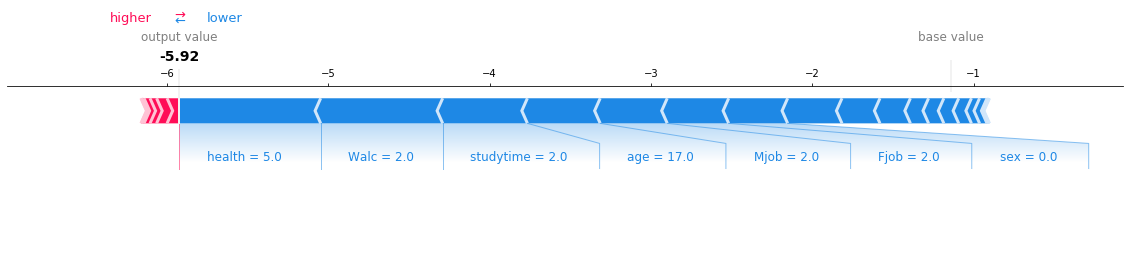

In [128]:
explainer = shap.TreeExplainer(mcl)
shap_values = explainer.shap_values(X_train4.loc[idx])
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], X_rand, matplotlib = True, show = False)

## plt.savefig("shap0.pdf", format='pdf', dpi=1000, bbox_inches='tight')


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


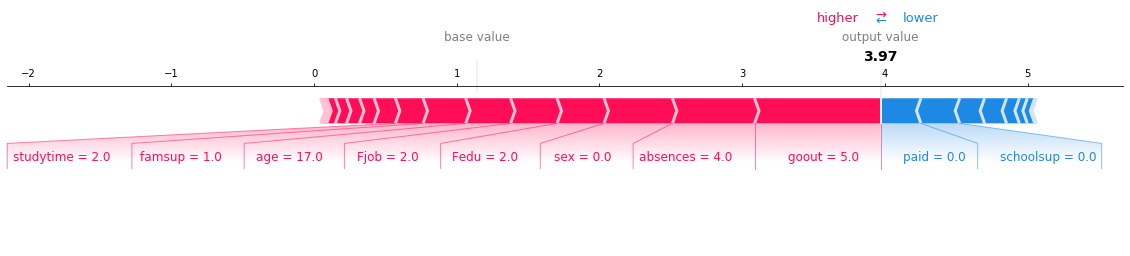

In [129]:
explainer = shap.TreeExplainer(mcl)
shap_values = explainer.shap_values(X_train4.loc[idx])
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], X_rand, matplotlib = True, show = False)

## plt.savefig("shap1.pdf", format='pdf', dpi=1000, bbox_inches='tight')

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


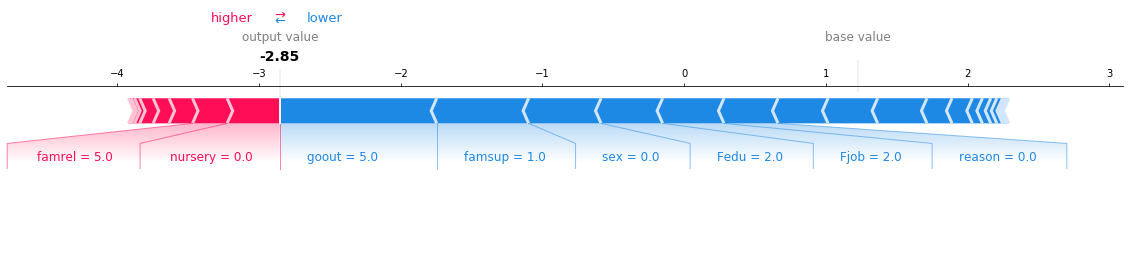

In [130]:
explainer = shap.TreeExplainer(mcl)
shap_values = explainer.shap_values(X_train4.loc[idx])
shap.initjs()
shap.force_plot(explainer.expected_value[2], shap_values[2], X_rand, matplotlib = True, show = False)

## plt.savefig("shap2.pdf", format='pdf', dpi=1000, bbox_inches='tight')

In [133]:
explainer = shap.TreeExplainer(mcl)
shap_values = explainer.shap_values(X_train4.loc[idx])
shap.initjs()
for which_class in range(0,3):
    display(shap.force_plot(explainer.expected_value[which_class], shap_values[which_class], X_rand))